In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! ls

kaggle.json  sample_data


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 664M/675M [00:04<00:00, 181MB/s]
100% 675M/675M [00:04<00:00, 167MB/s]


['Parasitized', 'Uninfected']


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision
import torchvision.models as models
from torchvision import datasets, transforms
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F

In [11]:
train_transforms = transforms.Compose([transforms.Resize((120, 120)),
                                       transforms.ColorJitter(0.05),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(20),
                                       transforms.ToTensor(), 
                                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                                     ])

train_set = datasets.ImageFolder(r"/content/drive/MyDrive/Kaggle/TB_Chest_Radiography_Database/", transform = train_transforms)

In [12]:
test_size = 0.2
num_train = len(train_set)
indices = list(range(num_train))
np.random.shuffle(indices)

test_split = int(np.floor((test_size)*num_train))
train_index, test_index = indices[test_split - 1 :], indices[: test_split - 1]

train_sampler = SubsetRandomSampler(train_index)
test_sampler = SubsetRandomSampler(test_index)

train_loader = DataLoader(train_set, sampler=train_sampler, batch_size=104)
test_loader = DataLoader(train_set, sampler=test_sampler, batch_size=58)

print("Images in Test set: {}\nImages in Train set: {}".format(len(test_index), len(train_index)))               

Images in Test set: 839
Images in Train set: 3361


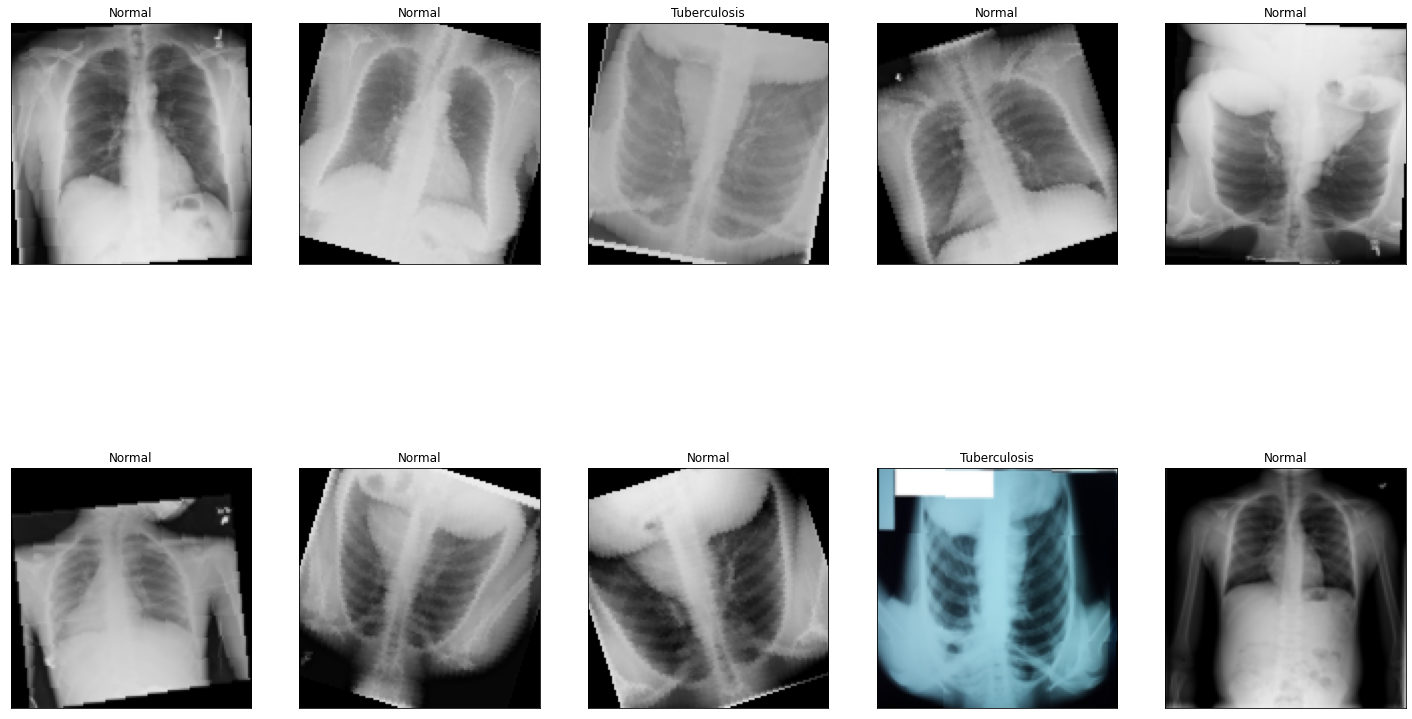

In [13]:
classes=['Normal','Tuberculosis']
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(25, 15))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title=classes[labels[i]])
    imshow(images[i])
plt.show()

In [14]:
model = models.resnet34(pretrained = True)
num_features_last = model.fc.in_features
model.fc = nn.Linear(num_features_last, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)



Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [6]:
cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [7]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 98% 650M/663M [00:05<00:00, 120MB/s]
100% 663M/663M [00:05<00:00, 117MB/s]


In [8]:
!unzip \*.zip  && rm *.zip

Archive:  tuberculosis-tb-chest-xray-dataset.zip
replace TB_Chest_Radiography_Database/Normal.metadata.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/

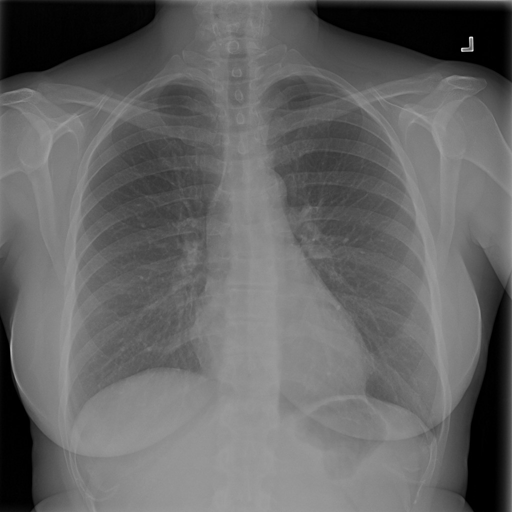

In [9]:
from PIL import Image 

im = Image.open(r"/content/drive/My Drive/Kaggle/TB_Chest_Radiography_Database/Normal/Normal-1044.png") 
im2= Image.open(r"/content/drive/My Drive/Kaggle/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-349.png") 
im.show()
im2.show()
im

In [15]:
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)

SyntaxError: ignored

Epoch: 1, Loss: 0.0639
Epoch: 2, Loss: 0.0551
Epoch: 3, Loss: 0.0438
Epoch: 4, Loss: 0.0503
Epoch: 5, Loss: 0.0759
Epoch: 6, Loss: 0.0422
Epoch: 7, Loss: 0.0370
Epoch: 8, Loss: 0.0340
Epoch: 9, Loss: 0.0291
Epoch: 10, Loss: 0.0177
Epoch: 11, Loss: 0.0222
Epoch: 12, Loss: 0.0299
Epoch: 13, Loss: 0.0178
Epoch: 14, Loss: 0.0234
Epoch: 15, Loss: 0.0250
Epoch: 16, Loss: 0.0198
Epoch: 17, Loss: 0.0155
Epoch: 18, Loss: 0.0127
Epoch: 19, Loss: 0.0172
Epoch: 20, Loss: 0.0103
Epoch: 21, Loss: 0.0160
Epoch: 22, Loss: 0.0071
Epoch: 23, Loss: 0.0312
Epoch: 24, Loss: 0.0239
Epoch: 25, Loss: 0.0305
Epoch: 26, Loss: 0.0299
Epoch: 27, Loss: 0.0195
Epoch: 28, Loss: 0.0140
Epoch: 29, Loss: 0.0222
Epoch: 30, Loss: 0.0097


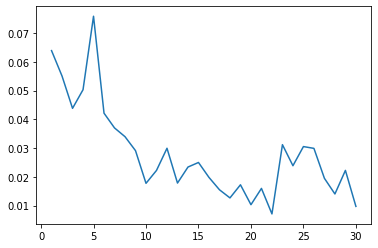

In [18]:
num_epochs = 30
batch_size = 100 

def plot_loss(epoch, loss):
  plt.plot(epoch, loss)

loss_val = []

for epoch in range(num_epochs):
    train_loss = 0.
    model.train()    # explictily stating the training
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        train = images.view(-1, 3, 120, 120)
        outputs = model(train)
        
        optimizer.zero_grad()
        loss = error(outputs, labels)
        loss.backward()    #back-propagation
        optimizer.step()
        
        train_loss += loss.item() * batch_size


    loss_val.append(train_loss / len(train_loader.dataset)) 
    print("Epoch: {}, Loss: {:.4f}".format(epoch + 1, train_loss / len(train_loader.dataset)))

plot_loss(np.linspace(1, num_epochs, num_epochs).astype(int), loss_val)

In [19]:
correct = 0
total = 0
class_total = [0 for _ in range(2)]
class_correct = [0 for _ in range(2)]
batch_size = 20
# Lists used in Confusion Matrix
actual = []
predict = []

model.eval()    # explicitly stating the testing 
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to (device)
        
        actual.append(labels.data.tolist())
        test = images.view(-1, 3, 120, 120)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        predict.append(predicted.data.tolist())
        total += len(labels)
        correct += (predicted == labels).sum().item()
        # Calculating classwise accuracy
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        
print("Accuracy on the Test set: {:.2f}%".format(correct * 100 / total))
print()
for i in range(2):
    print("Accuracy of {} :  {:.2f}%   [{} / {}]".format(classes[i], class_correct[i] * 100 / class_total[i], 
                                           class_correct[i], class_total[i]))

Accuracy on the Test set: 99.17%

Accuracy of Normal :  99.60%   [252 / 253]
Accuracy of Tuberculosis :  97.87%   [46 / 47]


In [20]:
len(actual)

15

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

#flatten out 2D list into 1D
actual = list(itertools.chain.from_iterable(actual))
predict = list(itertools.chain.from_iterable(predict))
results = confusion_matrix(actual, predict)
print("Accuracy Score: ")
print("{:.4f}".format(accuracy_score(actual, predict)))
print()
print("Report: ")
print(classification_report(actual, predict))
print()
print("Confusion Matrix: ")
print(pd.DataFrame(results, columns=["Predicted No", "Predicted Yes"], index=["Actual No", "Actual Yes"]))


Accuracy Score: 
0.9917

Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       701
           1       0.97      0.98      0.97       138

    accuracy                           0.99       839
   macro avg       0.98      0.99      0.98       839
weighted avg       0.99      0.99      0.99       839


Confusion Matrix: 
            Predicted No  Predicted Yes
Actual No            697              4
Actual Yes             3            135
